# Problem Description

In this notebook, we explore the Service Inventory data provided by the Government of Canada on Open Government [website](https://open.canada.ca/data/en/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c).

# Obtaining Data

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Datasets

In [2]:
#url_inv = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/3acf79c0-a5f5-4d9a-a30d-fb5ceba4b60a/download/service_inventory.csv"
filename_inv = "service_inventory.csv"
#df_inv = pd.read_csv(url_inv, keep_default_na=False)
#df_inv.to_csv(filename_inv)
df_inv = pd.read_csv(filename_inv, na_values=[''], keep_default_na=False)

#url_std = "https://open.canada.ca/data/dataset/3ac0d080-6149-499a-8b06-7ce5f00ec56c/resource/272143a7-533e-42a1-b72d-622116474a21/download/service_standards.csv"
#df_std = pd.read_csv(url_std)

In [3]:
df_inv.head()

,Unnamed: 0,fiscal_yr,service_id,service_name_en,service_name_fr,department_name_en,department_name_fr,external_internal,service_type,special_designations,...,other_applications,e_registration,e_authentication,e_application,e_decision,e_issuance,e_feedback,client_feedback,special_remarks_en,special_remarks_fr
0,0,2016-2017,135,Farm Debt Mediation Service,Service de médiation en matière d'endettement ...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,"prior,crit",...,0,NA,NA,NA,NA,NA,NA,NaN,"The use of""NA"" in the SIN column is an indica...",NaN
1,1,2016-2017,136,AgriMarketing Program Assurance Systems,"Programme Agri-marketing, volet Systèmes d'ass...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
2,2,2016-2017,137,AgriMarketing Program Market Development,"Programme Agri-marketing, volet Développement ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
3,3,2016-2017,138,AgriInnovation Program Industry-led Research a...,"Programme Agri-innovation, Activités de recher...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN
4,4,2016-2017,139,AgriInnovation Program Enabling Commercializat...,"Programme Agri-innovation, Facilitation de la ...",Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,extern,res,prior,...,0,NA,NA,Y,Y,N,N,NaN,NaN,NaN


In [4]:
df_inv.shape

(1865, 38)

# Data Cleanup

In [6]:
df_inv.isna().sum()

Unnamed: 0                    0
fiscal_yr                     0
service_id                    0
service_name_en               0
service_name_fr               0
department_name_en            0
department_name_fr            0
external_internal             0
service_type                  0
special_designations          0
service_description_en        0
service_description_fr        0
service_url_en              539
service_url_fr              539
program_name_en               3
program_name_fr               3
last_GBA                    853
client_target_groups          0
info_service                  0
service_fee                   0
cra_business_number           0
use_of_sin                    0
service_channels              0
online_applications           0
web_visits_info_service       0
calls_received                0
in_person_applications        0
postal_mail_applications      0
other_applications            0
e_registration                0
e_authentication              0
e_applic

## E_ Columns: 3.27 – 3.32

No cleaning needs to be done.

In [7]:
def display_unique_elements(df, col):
    print("\n\n*** " + col.upper() + " ***")
    print("\nNUMBER OF MISSING ELEMENTS:", df[col].isna().sum())
    print("\nUNIQUE ELEMENTS:", df[col].unique())
    print("\nUNIQUE ELEMENT COUNT (DESC):")
    for idx, val in df.fillna("nan").groupby(col).size().sort_values(ascending=False).iteritems():
        print(idx, val)

In [8]:
e_columns = ['e_registration', 'e_authentication', 'e_application', 'e_decision', 'e_issuance', 'e_feedback']

for col in e_columns:
    display_unique_elements(df_inv, col)



*** E_REGISTRATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
NA 726
Y 575
N 564


*** E_AUTHENTICATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 691
NA 641
Y 533


*** E_APPLICATION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 725
Y 581
NA 559


*** E_DECISION ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'Y' 'N']

UNIQUE ELEMENT COUNT (DESC):
N 783
Y 547
NA 535


*** E_ISSUANCE ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'N' 'Y']

UNIQUE ELEMENT COUNT (DESC):
N 723
NA 647
Y 495


*** E_FEEDBACK ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['NA' 'N' 'Y']

UNIQUE ELEMENT COUNT (DESC):
Y 749
N 739
NA 377


## Fiscal Year

No cleaning needs to be done.

In [9]:
display_unique_elements(df_inv, 'fiscal_yr')



*** FISCAL_YR ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['2016-2017' '2017-2018' '2018-2019']

UNIQUE ELEMENT COUNT (DESC):
2018-2019 1180
2016-2017 347
2017-2018 338


## Department Name

No cleaning needs to be done.

In [10]:
display_unique_elements(df_inv, 'department_name_en')



*** DEPARTMENT_NAME_EN ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['Agriculture and Agri-Food Canada' 'Canada Border Services Agency'
 'Canadian Food Inspection Agency'
 'Immigration, Refugees and Citizenship Canada' 'Canada Revenue Agency'
 'Canada School of Public Service'
 'Employment and Social Development Canada'
 'Innovation, Science and Economic Development Canada'
 'Public Services and Procurement Canada' 'Shared Services Canada'
 'Veterans Affairs Canada' 'Fisheries and Oceans Canada'
 'Crown-Indigenous Relations and Northern Affairs Canada'
 'Transport Canada' 'Public Health Agency of Canada'
 'Office of the Superintendent of Financial Institutions Canada'
 'Department of Indigenous Services' 'Public Safety Canada'
 'Global Affairs Canada' 'Western Economic Diversification Canada'
 'The National Battlefields Commission'
 'Immigration and Refugee Board of Canada' 'Health Canada'
 'Environment and Climate Change Canada' 'Correctional Service Canada'
 'Canadian Trans

## External Service or Internal Enterprise Service: 3.4

In [11]:
display_unique_elements(df_inv, 'external_internal')



*** EXTERNAL_INTERNAL ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['extern' 'enterprise' 'extern,enterprise' 'extern,enterprise,intern'
 'extern,intern' 'enterprise,intern' 'intern,extern' 'intern'
 'enterprise,extern,intern' 'enterprise,extern' 'intern,enterprise,extern'
 'extern,intern,enterprise']

UNIQUE ELEMENT COUNT (DESC):
extern 1461
enterprise 220
extern,enterprise 136
extern,intern 18
extern,enterprise,intern 9
intern 6
enterprise,extern 6
enterprise,intern 5
intern,extern 1
intern,enterprise,extern 1
extern,intern,enterprise 1
enterprise,extern,intern 1


The three values `Ex`, `IN`, and `EI` from the DEP for *external service*, *internal enterprise servie*, and *external/internal enterprise servie* are adopted.

In [12]:
def translate_to_EI(val):
    if val == 'extern':
        return 'Ex'
    elif val in ['enterprise', 'intern', 'enterprise,intern']:
        return 'IN'
    else:
        return 'EI'

In [13]:
df_inv.external_internal = df_inv.external_internal.map(translate_to_EI)
display_unique_elements(df_inv, 'external_internal')



*** EXTERNAL_INTERNAL ***

NUMBER OF MISSING ELEMENTS: 0

UNIQUE ELEMENTS: ['Ex' 'IN' 'EI']

UNIQUE ELEMENT COUNT (DESC):
Ex 1461
IN 231
EI 173


# Data Exploration

## Departments

Total number of services / department.

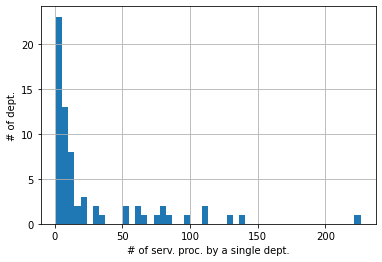

In [77]:
df_inv.groupby('department_name_en').size().hist(bins=50)

plt.xlabel('# of serv. proc. by a single dept.')
plt.ylabel('# of dept.')

plt.show()

In [57]:
df_inv.groupby('department_name_en').size().describe()

count     67.000000
mean      27.835821
std       42.336887
min        1.000000
25%        3.000000
50%        7.000000
75%       32.000000
max      226.000000
dtype: float64

Total number of services / department / year.

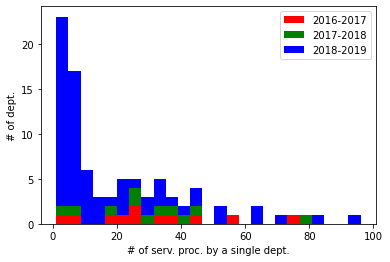

In [78]:
yrs = ['2016-2017', '2017-2018', '2018-2019']

ss = []
for yr in yrs:
    ss.append(df_inv[df_inv['fiscal_yr'] == yr].groupby('department_name_en').size())

plt.hist(ss, stacked=True, bins=25, color=['r', 'g', 'b'], label=yrs)
plt.legend()

plt.xlabel('# of serv. proc. by a single dept.')
plt.ylabel('# of dept.')

plt.show()

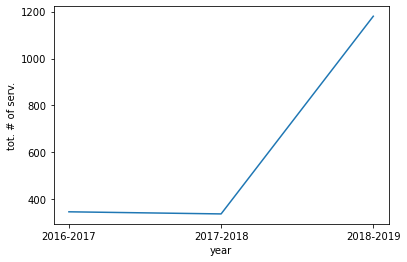

In [104]:
plt.plot(yrs, [s.sum() for s in ss])

plt.xlabel('year')
plt.ylabel('tot. # of serv.')

plt.show()

How many departments received or processed services each year?

In [92]:
print('# OF DEPT. INVOLVED:')
for i in range(3):
    print(yrs[i], ss[i].size)

# OF DEPT. INVOLVED:
2016-2017 11
2017-2018 11
2018-2019 67


What were the top 5 departments (wrt number of services processed) each year?

In [99]:
print('TOP 5 DEPT.:')
for i in range(3):
    print('\n' + yrs[i])
    for idx, val in ss[i].sort_values(ascending=False).iloc[0:5].iteritems():
        print(idx, val)

TOP 5 DEPT.:

2016-2017
Immigration, Refugees and Citizenship Canada 76
Public Services and Procurement Canada 55
Canada Border Services Agency 44
Employment and Social Development Canada 36
Innovation, Science and Economic Development Canada 34

2017-2018
Immigration, Refugees and Citizenship Canada 78
Canada Border Services Agency 44
Public Services and Procurement Canada 39
Employment and Social Development Canada 37
Innovation, Science and Economic Development Canada 34

2018-2019
Transport Canada 96
Health Canada 83
Immigration, Refugees and Citizenship Canada 72
Department of Indigenous Services 64
Crown-Indigenous Relations and Northern Affairs Canada 62


## External Service or Internal Enterprise Service:

In [ ]:
df_inv.groupby('external_internal').size().pie()